In [5]:
from cluster_g_logit_init import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/filesforupload/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:

# Set all seeds before creating model
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


Y, E, G, essentials = load_model_essentials()
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=essentials['K'],
P=essentials['P'],
G=G,
Y=Y,
prevalence_t=essentials['prevalence_t']
)


Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_31130/3240220042.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 16 diseases
Cluster 1: 21 diseases
Cluster 2: 15 diseases
Cluster 3: 82 diseases
Cluster 4: 5 diseases
Cluster 5: 7 diseases
Cluster 6: 8 diseases
Cluster 7: 22 diseases
Cluster 8: 28 diseases
Cluster 9: 12 diseases
Cluster 10: 11 diseases
Cluster 11: 8 diseases
Cluster 12: 7 diseases
Cluster 13: 13 diseases
Cluster 14: 10 diseases
Cluster 15: 5 diseases
Cluster 16: 29 diseases
Cluster 17: 17 diseases
Cluster 18: 9 diseases
Cluster 19: 23 diseases
Initialization complete!


In [6]:
def subset_data(Y, E, G, n_samples=100000, seed=42):
    """
    Subset the data to n_samples individuals while maintaining consistency
    
    Args:
        Y: tensor of shape [N, D, T]
        E: tensor of shape [N, D]
        G: tensor of shape [N, P]
        n_samples: number of individuals to keep
        seed: random seed for reproducibility
    
    Returns:
        Y_sub, E_sub, G_sub: subsetted tensors
    """
    torch.manual_seed(seed)
    
    # Get total number of individuals
    N = Y.shape[0]
    
    # Randomly select n_samples indices
    indices = torch.randperm(N)[:n_samples]
    
    # Subset all matrices using the same indices
    Y_sub = Y[indices]
    E_sub = E[indices]
    G_sub = G[indices]
    
    print(f"Original shapes: Y={Y.shape}, E={E.shape}, G={G.shape}")
    print(f"New shapes: Y={Y_sub.shape}, E={E_sub.shape}, G={G_sub.shape}")
    
    return Y_sub, E_sub, G_sub, indices

# Subset the data





Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, n_samples=100000)
# Set seeds again before fitting
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)


# Initialize model with subsetted data
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit(
    N=Y_100k.shape[0],
    D=Y_100k.shape[1],
    T=Y_100k.shape[2],
    K=essentials['K'],
    P=essentials['P'],
    G=G_100k,
    Y=Y_100k,
    prevalence_t=essentials['prevalence_t']
)

Original shapes: Y=torch.Size([407878, 348, 52]), E=torch.Size([407878, 348]), G=(407878, 36)
New shapes: Y=torch.Size([100000, 348, 52]), E=torch.Size([100000, 348]), G=(100000, 36)


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 104 diseases
Cluster 1: 16 diseases
Cluster 2: 18 diseases
Cluster 3: 11 diseases
Cluster 4: 16 diseases
Cluster 5: 27 diseases
Cluster 6: 5 diseases
Cluster 7: 5 diseases
Cluster 8: 7 diseases
Cluster 9: 13 diseases
Cluster 10: 12 diseases
Cluster 11: 9 diseases
Cluster 12: 23 diseases
Cluster 13: 5 diseases
Cluster 14: 10 diseases
Cluster 15: 8 diseases
Cluster 16: 27 diseases
Cluster 17: 13 diseases
Cluster 18: 8 diseases
Cluster 19: 11 diseases
Initialization complete!



Cluster Assignments:

Cluster 0:
  - Bacterial enteritis (prevalence: 0.0002)
  - Viral Enteritis (prevalence: 0.0001)
  - Viral warts & HPV (prevalence: 0.0001)
  - Viral infection (prevalence: 0.0004)
  - Breast cancer [female] (prevalence: 0.0002)
  - Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia] (prevalence: 0.0001)
  - Malignant neoplasm of kidney, except pelvis (prevalence: 0.0001)
  - Neoplasm of uncertain behavior (prevalence: 0.0001)
  - Non-Hodgkins lymphoma (prevalence: 0.0002)
  - Benign neoplasm of lip, oral cavity, and pharynx (prevalence: 0.0001)
  - Lipoma (prevalence: 0.0002)
  - Lipoma of skin and subcutaneous tissue (prevalence: 0.0004)
  - Other benign neoplasm of connective and other soft tissue (prevalence: 0.0001)
  - Hemangioma and lymphangioma, any site (prevalence: 0.0001)
  - Thyrotoxicosis with or without goiter (prevalence: 0.0002)
  - Secondary hypothyroidism (prevalence: 0.0001)
  - Hypothyroidism NOS (prevalence: 0.0014)
  - Hyperlipidem

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:803: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


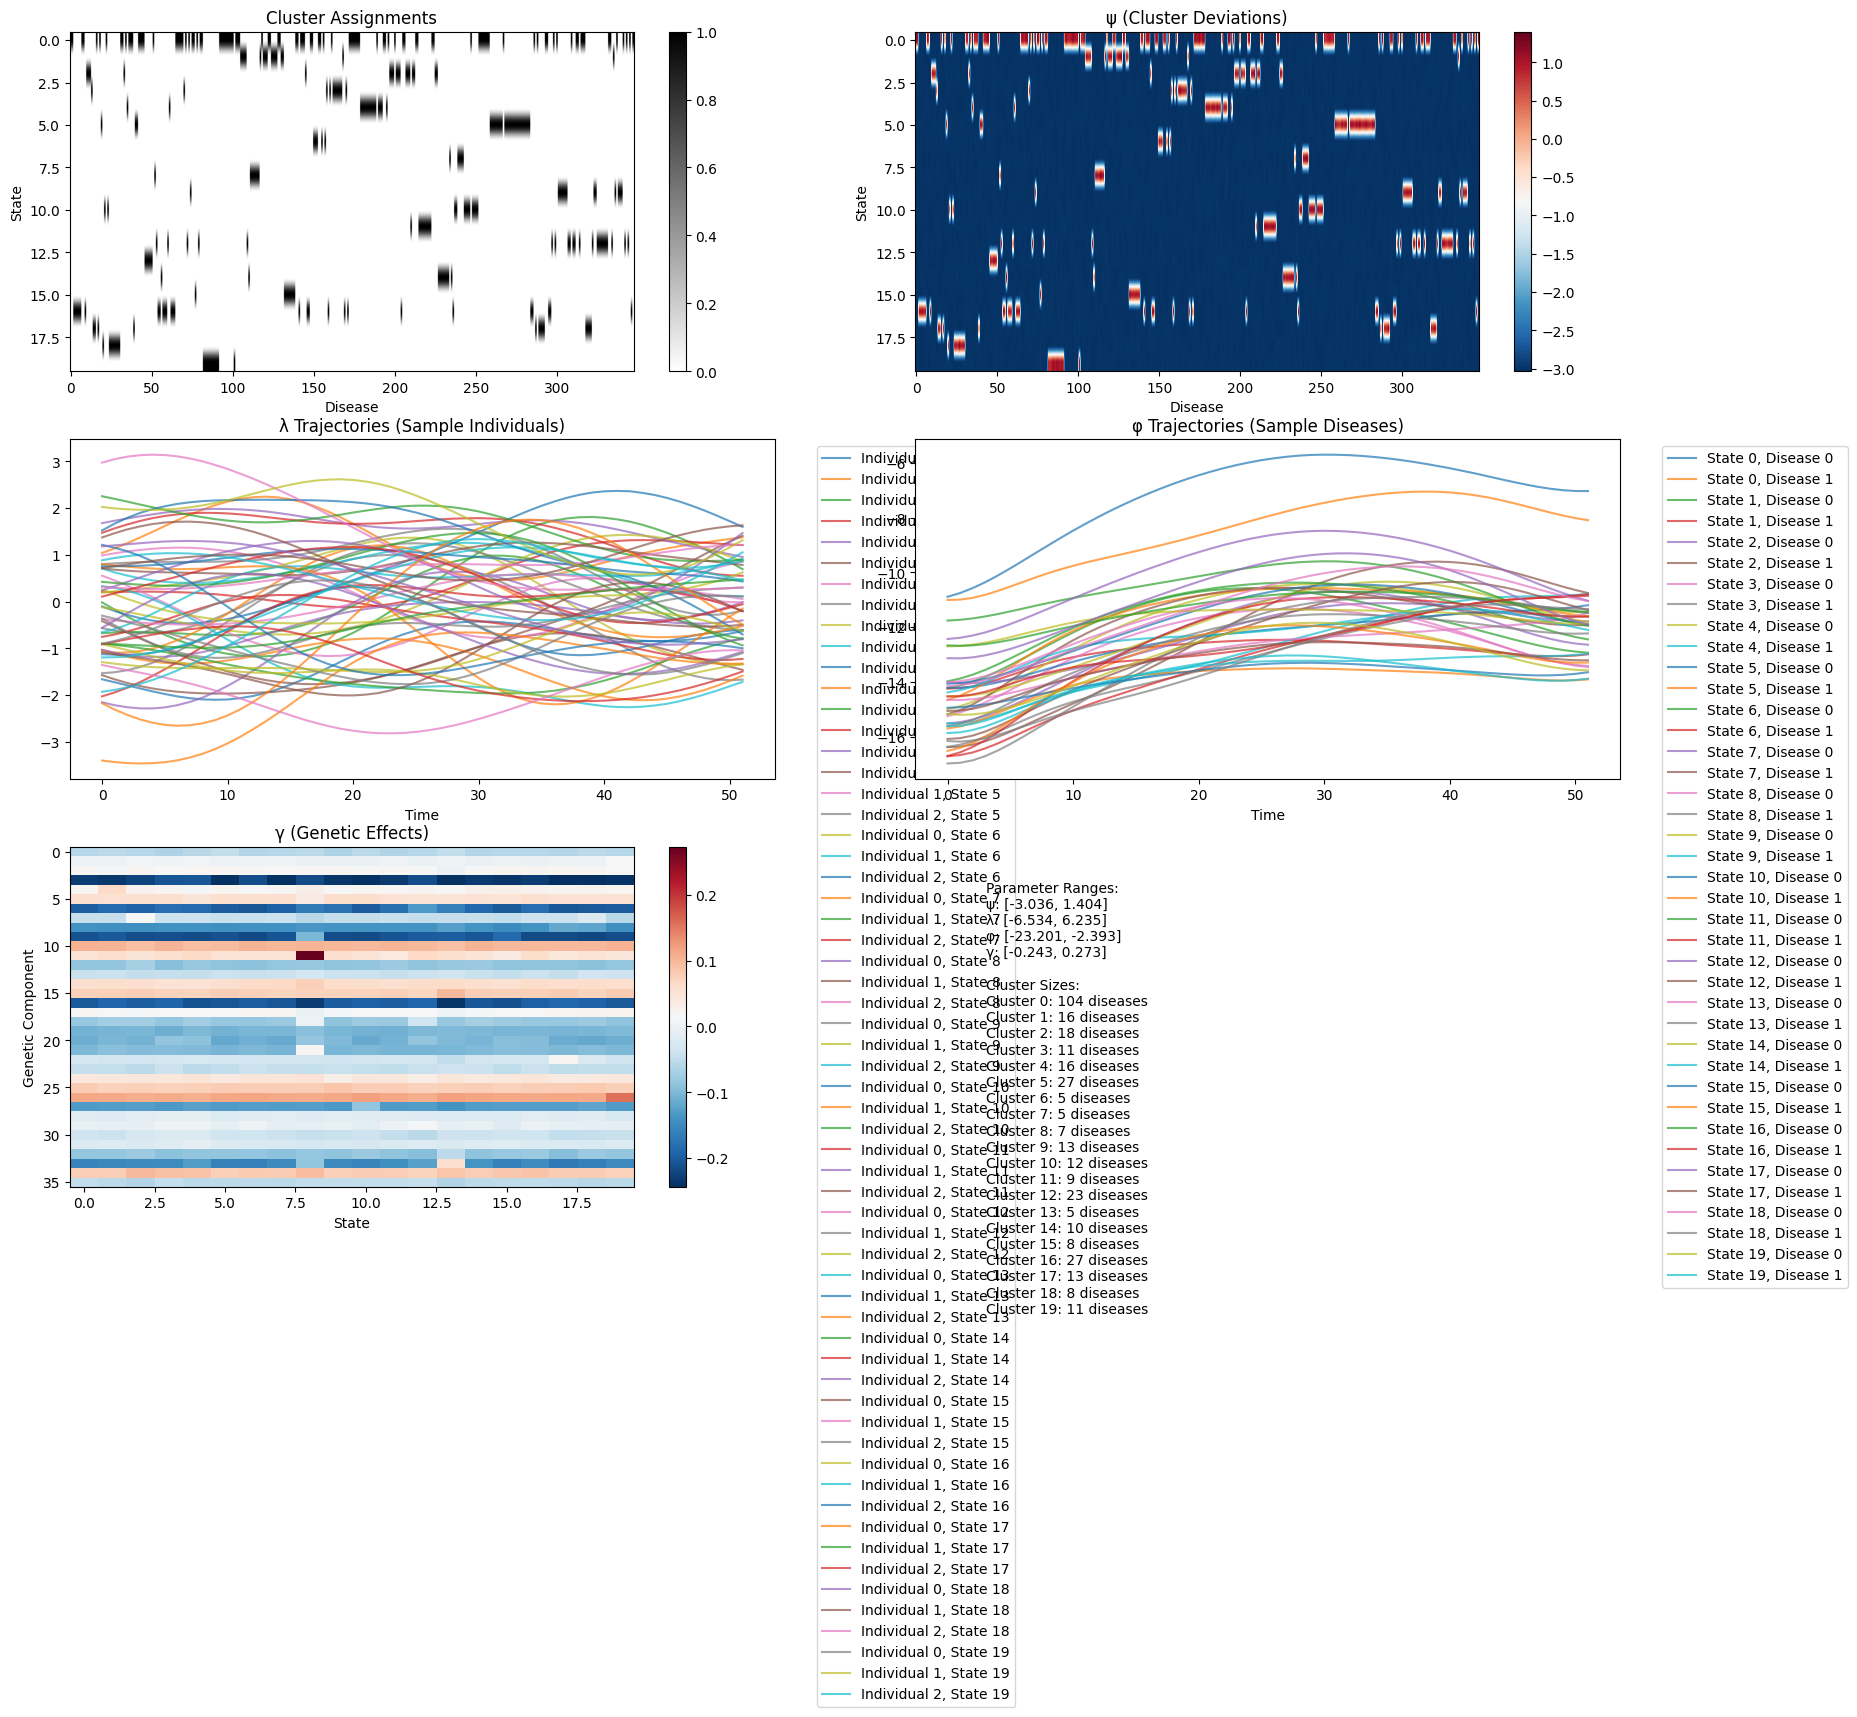

In [7]:
# Visualize the clusters
disease_names=essentials['disease_names']
disease_names_list = disease_names[0].tolist()
model.visualize_clusters(disease_names_list)
model.visualize_initialization()

In [8]:
initial_psi = model.psi.detach().clone()

# Run for just 10 epochs to check behavior
E_tensor = torch.tensor(E, dtype=torch.long)
# don't run below this line, computer will crash

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_31130/1345318076.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  E_tensor = torch.tensor(E, dtype=torch.long)


In [10]:
E.shape

torch.Size([407878, 348])

In [11]:
# Set seeds again before fitting
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)


history = model.fit(E_100k, num_epochs=1000, learning_rate=1e-4, lambda_reg=1e-2)

# Compare final vs initial psi
print("\nOverall psi changes:")

Starting training...


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)



Epoch 0
Loss: 1107.8159
Psi gradient stats:
Mean: -2.4986e-05
Std:  4.7182e-03
Max:  1.7905e-02
Min:  -1.9605e-02
Average psi change: 9.9903e-05
Epoch 0, Loss: 1107.8159, Gradients - Lambda: 5.875e-02, Phi: 1.324e+01, Gamma: 1.940e-02, Psi: 1.960e-02

Epoch 1
Loss: 838.0620
Psi gradient stats:
Mean: -2.5523e-05
Std:  4.7062e-03
Max:  1.7899e-02
Min:  -1.9776e-02
Average psi change: 9.9242e-05
Epoch 1, Loss: 838.0620, Gradients - Lambda: 5.643e-02, Phi: 1.235e+01, Gamma: 1.856e-02, Psi: 1.978e-02

Estimated total training time: 102078.4 minutes

Epoch 2
Loss: 645.5461
Psi gradient stats:
Mean: -2.5919e-05
Std:  4.6940e-03
Max:  1.7784e-02
Min:  -1.9920e-02
Average psi change: 9.8912e-05
Epoch 2, Loss: 645.5461, Gradients - Lambda: 5.319e-02, Phi: 1.152e+01, Gamma: 1.768e-02, Psi: 1.992e-02

Epoch 3
Loss: 513.8616
Psi gradient stats:
Mean: -2.6211e-05
Std:  4.6813e-03
Max:  1.7612e-02
Min:  -2.0047e-02
Average psi change: 9.8652e-05
Epoch 3, Loss: 513.8616, Gradients - Lambda: 4.983e-02